# Perspective Transform 
---
## Apply a perspective transform to rectify binary image ("birds-eye view").

### Importing libraries

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
import os
from ipywidgets import interact, interactive
%matplotlib inline

img_path = './test_images/straight_lines1.jpg'

### Load Camera Calibration Data created in Camera Calibration

In [2]:
with open('outputs/camera_calibration.p', mode='rb') as f:
    dist_pickle = pickle.load(f)
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]

def undistort(img):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

### Check Source Point

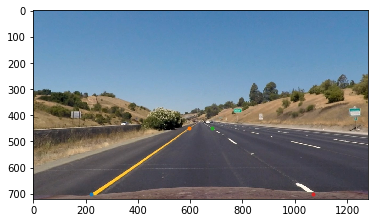

In [3]:
#source image point
img=plt.imread(img_path)
plt.imshow(undistort(img))

plt.plot(220, 700, '.')
plt.plot(595, 450, '.')
plt.plot(685, 450, '.')
plt.plot(1070, 700, '.')

plt.show()


### Define the warp function, which makes perspective taransform

In [4]:
def warper(img, corners):
    new_top_left = np.array([corners[0,0],0])
    new_top_right = np.array([corners[3,0],0])
    offset = [150,0]
    img_size = (img.shape[1], img.shape[0])
    src = np.float32([ corners[0], corners[1], corners[2], corners[3]])
    dst = np.float32([ corners[0]+offset, new_top_left+offset, new_top_right-offset, corners[3]-offset])
    ptm = cv2.getPerspectiveTransform(src, dst)
    ptm_inv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, ptm, img_size , flags=cv2.INTER_LINEAR)    
    return warped, ptm, ptm_inv

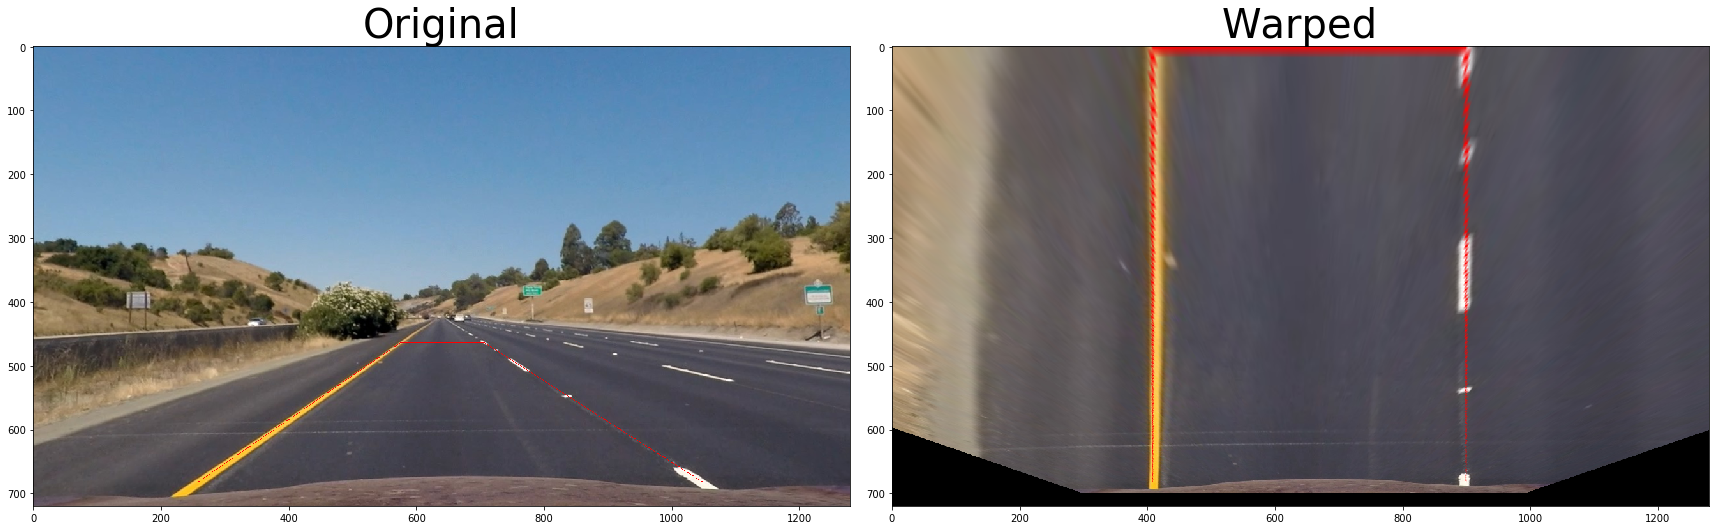

In [5]:
# destination points
corners = np.float32([(258,682),(575,464),(707,464), (1049,682)])

img = plt.imread(img_path)
img = cv2.undistort(img, mtx, dist, None, mtx)

corner_tuples=[]
for i,c in enumerate(corners):
    corner_tuples.append(tuple(corners[i]))

cv2.line(img, corner_tuples[0], corner_tuples[1], color=[255,0,0], thickness=1)
cv2.line(img, corner_tuples[1], corner_tuples[2], color=[255,0,0], thickness=1)
cv2.line(img, corner_tuples[2], corner_tuples[3], color=[255,0,0], thickness=1)
cv2.line(img, corner_tuples[3], corner_tuples[0], color=[255,0,0], thickness=1)

warped, ptm, ptm_inv = warper(img, corners)

# Plot the result
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(img)
ax1.set_title('Original', fontsize=40)

ax2.imshow(warped)
ax2.set_title('Warped', fontsize=40)

plt.savefig('./outputs/birds_eye_view.png')

ptm_pickle = {}
ptm_pickle["ptm"] = ptm
ptm_pickle["ptm_inv"] = ptm_inv
pickle.dump( ptm_pickle, open( "outputs/perspective_transform_matrix.p", "wb" ) )
